# Analysis of Student Spending

## Setting up the Environment

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read dataset into Pandas DataFrame, set index col
student_spending_df = pd.read_excel('student_spending.xlsx', index_col='index')
student_spending_df

,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
index,,,,,,,,,,,,,,,,,
0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,Female,Senior,Biology,1346,520,3688,969,152,194,151,42,38,252,65,163,Cash
996,19,Female,Senior,Biology,1407,560,3380,508,265,52,206,40,98,274,84,135,Mobile Payment App
997,20,Male,Junior,Economics,957,393,3497,723,339,139,69,112,46,284,57,28,Mobile Payment App


## Exploratory Data Analysis

In [3]:
# Number of columns
student_spending_df.shape[1]

17

In [4]:
# Names of columns 
student_spending_df.columns

Index(['age', 'gender', 'year_in_school', 'major', 'monthly_income',
       'financial_aid', 'tuition', 'housing', 'food', 'transportation',
       'books_supplies', 'entertainment', 'personal_care', 'technology',
       'health_wellness', 'miscellaneous', 'preferred_payment_method'],
      dtype='object')

In [5]:
# Number of Rows
student_spending_df.shape[0]

1000

In [6]:
# Data types for columns
student_spending_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   int64 
 1   gender                    1000 non-null   object
 2   year_in_school            1000 non-null   object
 3   major                     1000 non-null   object
 4   monthly_income            1000 non-null   int64 
 5   financial_aid             1000 non-null   int64 
 6   tuition                   1000 non-null   int64 
 7   housing                   1000 non-null   int64 
 8   food                      1000 non-null   int64 
 9   transportation            1000 non-null   int64 
 10  books_supplies            1000 non-null   int64 
 11  entertainment             1000 non-null   int64 
 12  personal_care             1000 non-null   int64 
 13  technology                1000 non-null   int64 
 14  health_wellness           1000

## Part 1: Data Categorization and Cleaning

In [7]:
# Finding duplicates
student_spending_df.duplicated().any()

False

In [8]:
# drop duplicates
student_spending_df.drop_duplicates(inplace=True)

In [9]:
#displaying shape prior to dropping duplicates
student_spending_df.shape

(1000, 17)

In [10]:
#Displaying shape after dropping duplicates
student_spending_df.shape

(1000, 17)

In [11]:
# Display numeric columns
numeric_cols = student_spending_df.select_dtypes(include=[np.number]).columns
numeric_cols

Index(['age', 'monthly_income', 'financial_aid', 'tuition', 'housing', 'food',
       'transportation', 'books_supplies', 'entertainment', 'personal_care',
       'technology', 'health_wellness', 'miscellaneous'],
      dtype='object')

In [12]:
# Display non-numeric columns
cat_cols = student_spending_df.select_dtypes(exclude=[np.number]).columns
cat_cols

Index(['gender', 'year_in_school', 'major', 'preferred_payment_method'], dtype='object')

In [13]:
# Find percentage of missing values for each column in the data set 
for col in student_spending_df.columns:
    percentage_of_missing = np.mean(student_spending_df[col].isnull())
    print('{} - {}%'.format(col, round(percentage_of_missing*100)))

age - 0%
gender - 0%
year_in_school - 0%
major - 0%
monthly_income - 0%
financial_aid - 0%
tuition - 0%
housing - 0%
food - 0%
transportation - 0%
books_supplies - 0%
entertainment - 0%
personal_care - 0%
technology - 0%
health_wellness - 0%
miscellaneous - 0%
preferred_payment_method - 0%


In [14]:
#saving an imputed copy
imputed_df = student_spending_df 

In [15]:
# Impute missing values less than 2% with the median of the data in the numeric feature.
for col in imputed_df.columns:
    if col in imputed_df.select_dtypes(include=[np.number]).columns and percentage_of_missing < 0.02:
        imputed_df[col].fillna(imputed_df[col].median(), inplace=True)

In [16]:
# Impute missing values less than 5% with the mode of the data in the numeric feature.
for col in imputed_df.columns:
    if col in imputed_df.select_dtypes(include=[np.number]).columns and percentage_of_missing < 0.05:
        imputed_df[col].fillna(imputed_df[col].mode(), inplace=True)

In [17]:
# Replace non-numeric missing values with the word '_NA_' for any feature with less than 5% missing values.
for col in imputed_df.columns:
    if col in imputed_df.select_dtypes(exclude=[np.number]).columns and percentage_of_missing < 0.05:
        imputed_df[col].fillna('NA', inplace=True)

In [18]:
# Replace all non-numeric missing values less than 5% with the most frequent value for the feature (mode).
for col in imputed_df.columns:
    if col in imputed_df.select_dtypes(exclude=[np.number]).columns and percentage_of_missing < 0.05:
        imputed_df[col].fillna(imputed_df[col].mode()[0], inplace=True)

In [19]:
# Replace any remaining missing numeric value with 0
for col in imputed_df.columns:
    if col in imputed_df.select_dtypes(include=[np.number]).columns:
        imputed_df[col] = imputed_df[col].fillna(0)   

In [20]:
# Replace any remaining non-numeric value with the word '_MISSING_'
for col in imputed_df.columns:
    if col in imputed_df.select_dtypes(exclude=[np.number]).columns:
        imputed_df[col] = imputed_df[col].fillna('_MISSING_')   

In [21]:
# Calcutes the upper and lower limits
for col in imputed_df.select_dtypes(include=['number']).columns:
    upper_limit = imputed_df[col].mean() + 3*imputed_df[col].std()
    lower_limit = imputed_df[col].mean() - 3*imputed_df[col].std()
    print(f"Upper limit for '{col}':", upper_limit)
    print(f"Lower limit for '{col}':", lower_limit)

Upper limit for 'age': 28.642993106191177
Lower limit for 'age': 14.707006893808826
Upper limit for 'monthly_income': 1902.1734841756343
Lower limit for 'monthly_income': 139.1265158243658
Upper limit for 'financial_aid': 1366.048725447112
Lower limit for 'financial_aid': -356.50672544711205
Upper limit for 'tuition': 7102.368832874501
Lower limit for 'tuition': 1938.4211671254993
Upper limit for 'housing': 1209.6618595188202
Lower limit for 'housing': 182.35014048117966
Upper limit for 'food': 513.4908194924997
Lower limit for 'food': -8.206819492499676
Upper limit for 'transportation': 255.3109712634683
Lower limit for 'transportation': -6.036971263468303
Upper limit for 'books_supplies': 391.9745553772823
Lower limit for 'books_supplies': -42.452555377282266
Upper limit for 'entertainment': 198.72535339566664
Lower limit for 'entertainment': -29.09735339566666
Upper limit for 'personal_care': 129.39302055098727
Lower limit for 'personal_care': -7.995020550987263
Upper limit for 'tec

In [22]:
# Find the outliers 
imputed_df.loc[(imputed_df[col] > upper_limit) | (imputed_df[col] < lower_limit)]

,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
index,,,,,,,,,,,,,,,,,


In [23]:
# Drop the outliers
clean_df = imputed_df.loc[(imputed_df[col] < upper_limit) & (imputed_df[col] > lower_limit)]
print('Before removing outliers:',len(imputed_df))
print('After removing outliers:',len(clean_df))
print('Outliers:', len(imputed_df)-len(clean_df))

Before removing outliers: 1000
After removing outliers: 1000
Outliers: 0


## Part 2: Descriptive Statistics 

In [24]:
clean_df.describe()

,age,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.675000,1020.650000,504.771000,4520.395000,696.00600,252.642000,124.63700,174.761000,84.814000,60.699000,178.304000,114.310000,108.910000
std,2.322664,293.841161,287.092575,860.657944,171.21862,86.949606,43.55799,72.404518,37.970451,22.898007,71.744441,49.591544,52.412221
min,18.000000,501.000000,0.000000,3003.000000,401.00000,100.000000,50.00000,50.000000,20.000000,20.000000,50.000000,30.000000,20.000000
25%,20.000000,770.750000,261.000000,3779.750000,538.75000,175.000000,88.00000,112.000000,54.000000,41.000000,114.000000,73.000000,63.750000
50%,22.000000,1021.000000,513.000000,4547.500000,704.50000,255.000000,123.00000,175.000000,86.000000,62.000000,178.000000,115.000000,110.000000
75%,24.000000,1288.250000,751.500000,5285.000000,837.25000,330.000000,162.25000,238.000000,116.000000,80.000000,241.000000,158.000000,153.000000
max,25.000000,1500.000000,1000.000000,6000.000000,1000.00000,400.000000,200.00000,300.000000,150.000000,100.000000,300.000000,200.000000,200.000000


In [25]:
# Grouping the data by 'year in school and summarizing monthly income 
school_year_df = imputed_df.groupby('year_in_school')
summary_stats = school_year_df['monthly_income'].agg(['mean', 'median', 'std']).round(2)
print("Summary statistics of monthly income by school year:")
summary_stats

Summary statistics of monthly income by school year:


,mean,median,std
year_in_school,,,
Freshman,1057.10,1104.0,305.72
Junior,1002.51,1011.0,290.33
Senior,1023.17,1025.5,287.87
Sophomore,998.77,972.5,289.01


In [26]:
# Grouping the data by 'gender' and summarizing monthly income
gender_df = imputed_df.groupby('gender')
summary_stats = gender_df['monthly_income'].agg(['mean', 'median', 'std']).round(2)
print("Summary statistics of monthly income by gender:")
summary_stats

Summary statistics of monthly income by gender:


,mean,median,std
gender,,,
Female,1024.33,1033.0,291.14
Male,1008.26,1000.5,295.19
Non-binary,1030.69,1038.0,295.48


In [27]:
#grouping by year in school and summarizing tuition
tuition_school_year_df = imputed_df.groupby('year_in_school')
summary_stats = tuition_school_year_df['tuition'].agg(['mean', 'median', 'std']).round(2)
print('Summary statistics for tuition by year in school')
(summary_stats)

Summary statistics for tuition by year in school


,mean,median,std
year_in_school,,,
Freshman,4506.46,4511.0,829.25
Junior,4587.38,4650.0,898.07
Senior,4456.97,4441.5,873.69
Sophomore,4532.96,4588.5,840.20


In [28]:
# Most frequent value for each non-numeric feature 
for col in cat_cols:
    most_freq_value= imputed_df[col].mode()[0]
    print(f"Column: {col}")
    print(f"Most frequent value: {most_freq_value}")

Column: gender
Most frequent value: Male
Column: year_in_school
Most frequent value: Senior
Column: major
Most frequent value: Biology
Column: preferred_payment_method
Most frequent value: Mobile Payment App


In [29]:
# The unique values for each non-numeric feature 
for col in cat_cols:
    unique_values = imputed_df[col].unique()
    print(F"Unique values for column '{col}': {unique_values}")

Unique values for column 'gender': ['Non-binary' 'Female' 'Male']
Unique values for column 'year_in_school': ['Freshman' 'Junior' 'Senior' 'Sophomore']
Unique values for column 'major': ['Psychology' 'Economics' 'Computer Science' 'Engineering' 'Biology']
Unique values for column 'preferred_payment_method': ['Credit/Debit Card' 'Cash' 'Mobile Payment App']


## Part 3: Data Visualization 

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

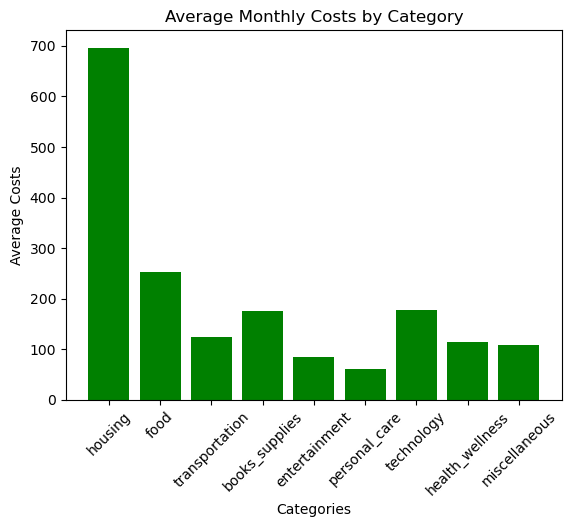

In [31]:
#Bar graph to display average monthly costs per category for all students.
categories = ['housing', 'food', 'transportation', 'books_supplies', 'entertainment', 'personal_care', 'technology', 'health_wellness', 'miscellaneous']
costs = [imputed_df[category].mean() for category in categories]

plt.bar(categories, costs, color='green')
plt.xlabel('Categories')
plt.ylabel('Average Costs')
plt.title('Average Monthly Costs by Category')
plt.xticks(rotation=45) 
plt.show()

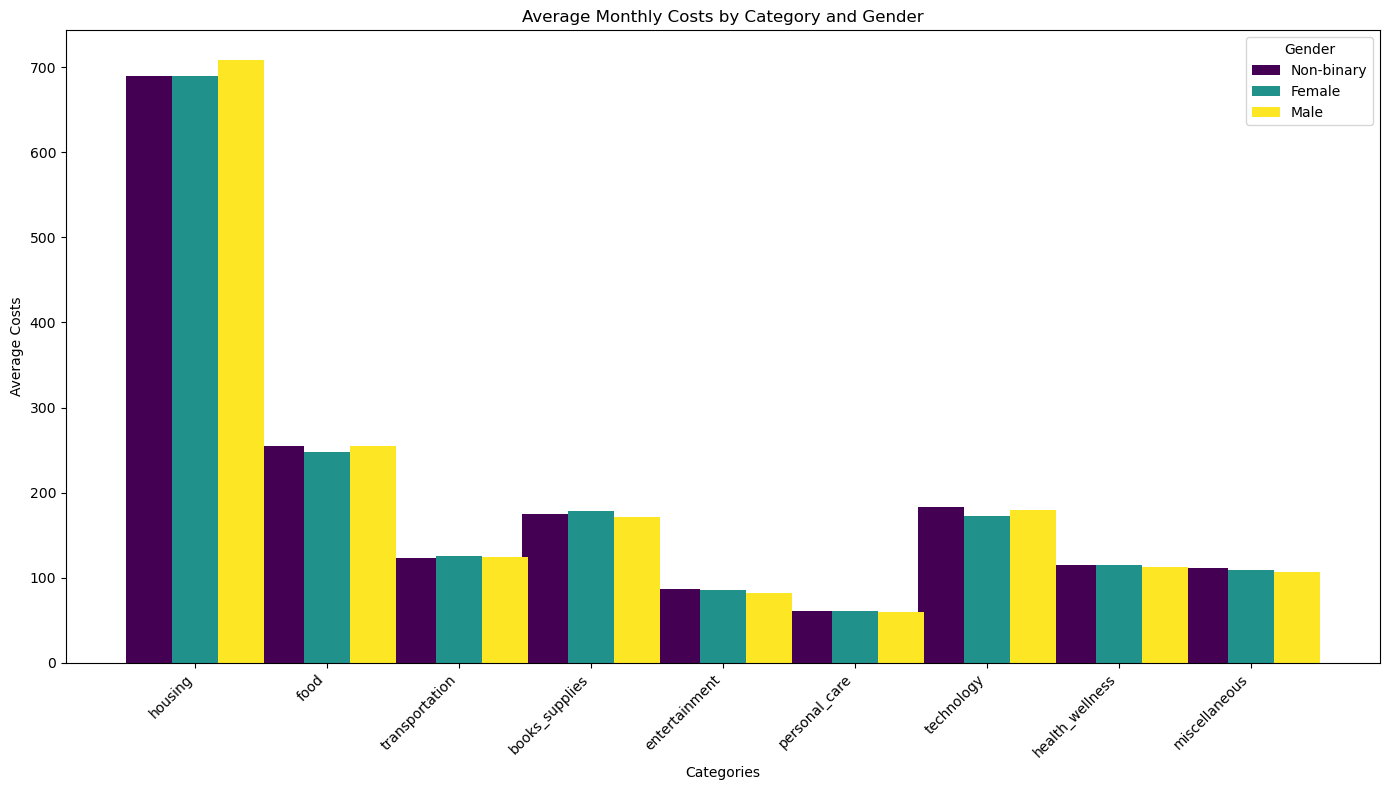

In [32]:
# Define the categories
categories = ['housing', 'food', 'transportation', 'books_supplies', 'entertainment', 'personal_care', 'technology', 'health_wellness', 'miscellaneous']

# Calculate average spending for each category separately for each gender
avg_spending_by_gender = {}
for gender in imputed_df['gender'].unique():
    avg_spending_by_gender[gender] = [imputed_df[imputed_df['gender'] == gender][category].mean() for category in categories]

# Convert the dictionary to a DataFrame for easier plotting
avg_spending_df = pd.DataFrame(avg_spending_by_gender, index=categories)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Define bar width and positions
bar_width = 0.35
index = np.arange(len(categories))

# Plot each gender's data
colors = plt.cm.viridis(np.linspace(0, 1, len(avg_spending_df.columns)))
for i, gender in enumerate(avg_spending_df.columns):
    ax.bar(index + i * bar_width, avg_spending_df[gender], bar_width, label=gender, color=colors[i])

# Set labels, title, and customize ticks
ax.set_xlabel('Categories')
ax.set_ylabel('Average Costs')
ax.set_title('Average Monthly Costs by Category and Gender')
ax.set_xticks(index + bar_width * (len(avg_spending_df.columns) / 2 - 0.5))
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend(title='Gender')

plt.tight_layout()
plt.show()

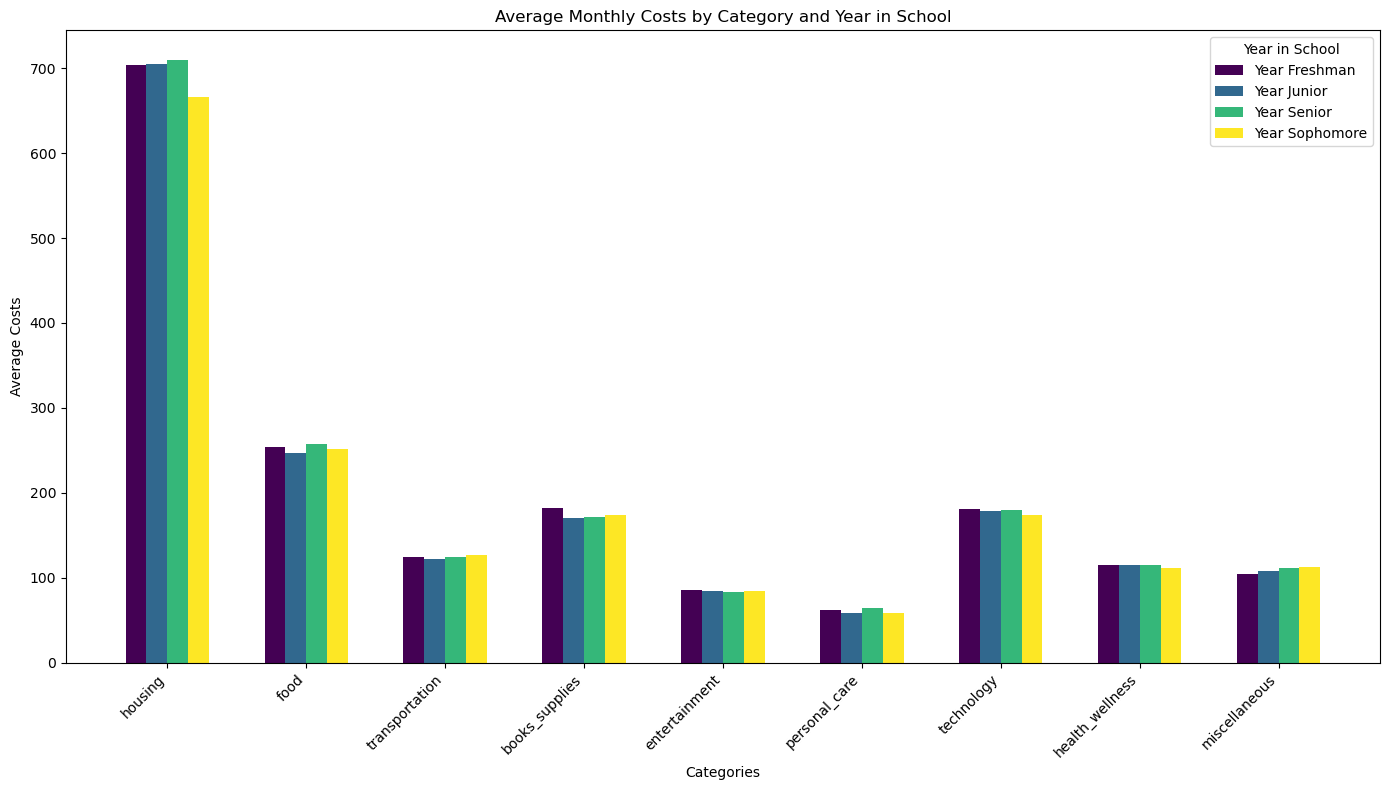

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Define the categories
categories = ['housing', 'food', 'transportation', 'books_supplies', 'entertainment', 'personal_care', 'technology', 'health_wellness', 'miscellaneous']

# Calculate average spending for each category separately for each year in school
avg_spending_by_year = {}
for year in imputed_df['year_in_school'].unique():
    avg_spending_by_year[year] = [imputed_df[imputed_df['year_in_school'] == year][category].mean() for category in categories]

# Convert the dictionary to a DataFrame for easier plotting
import pandas as pd
avg_spending_df = pd.DataFrame(avg_spending_by_year, index=categories).T

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Define bar width and positions
bar_width = 0.15
index = np.arange(len(categories))

# Plot each year's data
colors = plt.cm.viridis(np.linspace(0, 1, len(avg_spending_by_year)))
for i, year in enumerate(avg_spending_by_year.keys()):
    ax.bar(index + i * bar_width, avg_spending_df.loc[year], bar_width, label=f'Year {year}', color=colors[i])

# Set labels, title, and customize ticks
ax.set_xlabel('Categories')
ax.set_ylabel('Average Costs')
ax.set_title('Average Monthly Costs by Category and Year in School')
ax.set_xticks(index + bar_width * (len(avg_spending_by_year) / 2 - 0.5))
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend(title='Year in School')

plt.tight_layout()
plt.show()

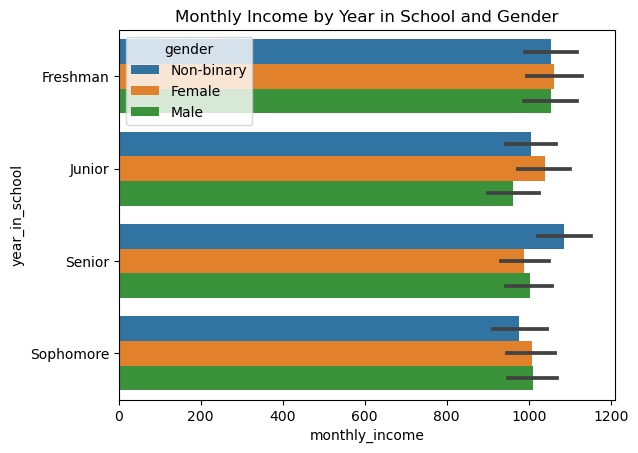

In [37]:
#barplot of monthly income by school year and gender
plt.title('Monthly Income by Year in School and Gender')
sns.barplot(x='monthly_income', y='year_in_school', hue='gender', data=imputed_df);

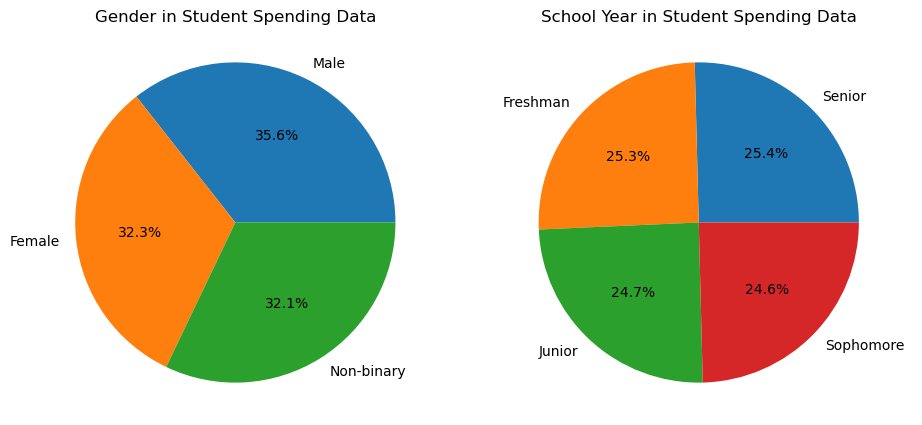

In [38]:
#Pie chart of gender count

plt.figure(figsize=(10, 5))

gender_counts = imputed_df['gender'].value_counts()

plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender in Student Spending Data')
plt.axis('equal')  

school_year_counts = imputed_df['year_in_school'].value_counts()

plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
plt.pie(school_year_counts, labels=school_year_counts.index, autopct='%1.1f%%')
plt.title('School Year in Student Spending Data')
plt.axis('equal')  

# Adjust layout
plt.tight_layout()

# Display titles above the subplots
plt.subplots_adjust(top=0.8)

# Show the plots
plt.show()

## References
1. Doulat, D. (2024). Programming for Data Analytics [Online Course]. East Tennessee State University.